# Mathematics for Machine Learning

## Session 21: Exponential functions and logarithms; second derivative

### Gerhard Jäger


January 16, 2025

---
<br><br>

<small>Most material taken from Chapters 2, 3 and 7 of Keisler, H. Jerome. *Elementary Calculus: An Infinitesimal Approach*. 2012.</small><br>
<small>Applets programmed with the help of ChatGPT</small>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


## The number $e$

Suppose you have deposited 1 Euro in an account, and you have an interest rate fo $100\%$. After one year, your account will hold 2 Euro.

Now suppose you ask the bank to pay out your interest after 6 months and re-invest it right away. The interest after half a year is $50\%$, which is paid twice.

$$
(1 + \frac{1}{2})^2 = 2.25
$$

If you split the year in 3 parts and re-invest the interest payment right away, your original deposit will be multiplied by

$$
(1 + \frac{1}{3})^3 \approx 2.37
$$

For four intervals, we have 

$$
(1 + \frac{1}{4})^4 \approx 2.44
$$

etc.
$$
\begin{align}
(1 + \frac{1}{5})^5 &\approx 2.49\\
(1 + \frac{1}{6})^6 &\approx 2.52\\
(1 + \frac{1}{7})^7 &\approx 2.55\\
&\vdots
\end{align}
$$


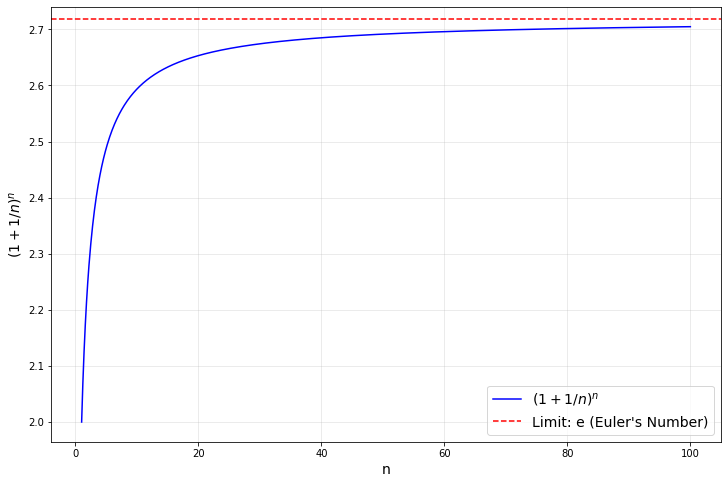

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function (1 + 1/n)^n
n_values = np.linspace(1, 100, 1000)  # n from 1 to 100
function_values = (1 + 1/n_values)**n_values

# Create the plot with a larger figure size
plt.figure(figsize=(12, 8))  # Increased size
plt.plot(n_values, function_values, label='$(1 + 1/n)^n$', color='blue')
plt.axhline(np.e, color='red', linestyle='--', label="Limit: e (Euler's Number)")
plt.xlabel('n', fontsize=14)
plt.ylabel('$(1 + 1/n)^n$', fontsize=14)
plt.legend(fontsize=14)
plt.grid(alpha=0.3)
plt.show()


When we take infinitely many infinitesimal intervals, we get
$$
(1+\frac{1}{H})^H
$$
for some infinite $H$. Regardless of $H$:

$$
\text{st}((1+\frac{1}{H})^H) = e \approx 2.718281828459045
$$



$e$ is called **Euler's number**. It is one of the most important numbers in mathematics.

It occurs in many functions relevant for machine learning

- exponential function: $\exp x = e^x$

- natural logarithm: $\ln x = \log_e x$

- normal distribution: $\cal N(x|\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$

- sigmoid (= logistic) function: $\sigma(x) = \frac{1}{1+e^{-x}}$

- tangent hyperbolicus: $\tanh x = \frac{e^{2x}-1}{e^{2x}+1}$

- cross-entropy: $H(p, q) = -\sum_{x\in\cal X} p(x)\ln q(x)$

important facts about $e$:
- $e$ is *irrational* and *transcendental*. It is not the solution of any finite polynomial.

- 
$$
e = \sum_{k=0}^\infty \frac{1}{k!}
$$

- Euler's formula: if $i=\sqrt{-1}$

$$
e^{i\pi} = -1
$$

## Exponential functions

If $a$ is a positive real number, then

$$
a^x
$$

is the exponential function with the base $a$. $x$ can be any real (and therefore hyperreal) number.

Important facts about exponential functions:

$$
\begin{align}
a^0 &= 1\\
a^1 &= a\\
a^{x+y} &= a^x a^y\\
(a^x)^y &= a^{xy}
\end{align}
$$



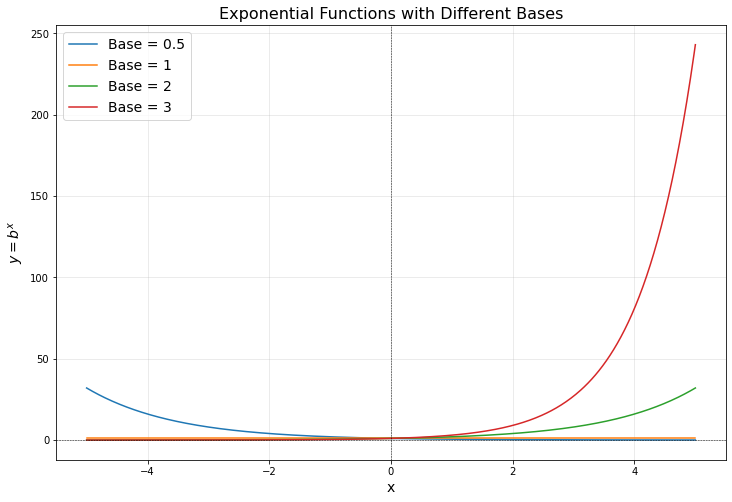

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values
x = np.linspace(-5, 5, 500)

# Define exponential functions with different bases
bases = [0.5, 1, 2, 3]
functions = {f'Base = {b}': b**x for b in bases}

# Create the plot
plt.figure(figsize=(12, 8))  # Larger figure size
for label, values in functions.items():
    plt.plot(x, values, label=label)

# Add labels, legend, and grid
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('x', fontsize=14)
plt.ylabel('$y = b^x$', fontsize=14)
plt.title('Exponential Functions with Different Bases', fontsize=16)
plt.legend(fontsize=14, loc='upper left')
plt.grid(alpha=0.3)

# Show the plot
plt.show()


## The derivative of exponential functions

We start with the exponential function with the basis $e$.

$$
\begin{align}
\frac{de^x}{dx} &= \text{st}\frac{e^{x+\Delta x}-e^{x}}{\Delta x}\\
&=\text{st}(e^{x}\frac{e^{\Delta x}-1}{\Delta x})\\
&=\text{st}(e^{x})\text{st}\frac{e^{\Delta x}-1}{\Delta x}\\
&= e^{x}\text{st}\frac{e^{\Delta x}-1}{\Delta x}\\
\end{align}
$$

Remember that $e = \text{st}((1+\frac{1}{H})^H)$ for any infinite $H$. So we can take $H=\frac{1}{\Delta x}$.
For expository purposes, I take it that $e = (1+\Delta x)^{\frac{1}{\Delta x}}$. This is strictly speaking false but useful to explain what's going on. Trust me that the proof can be made watertight.

$$
\begin{align}
&= e^{x}\text{st}\frac{((1+\Delta x)^{\frac{1}{\Delta x}})^{\Delta x}-1}{\Delta x}\\
&= e^{x}\text{st}\frac{(1+\Delta x)-1}{\Delta x}\\
&= e^{x}\text{st}\frac{\Delta x}{\Delta x}\\
&= e^x
\end{align}
$$



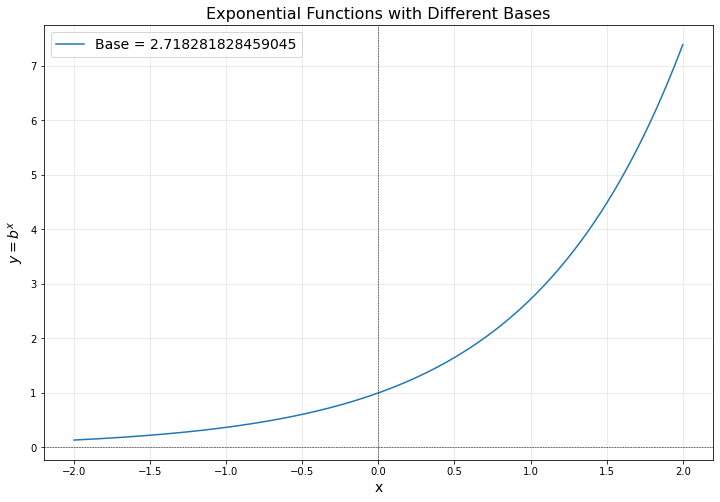

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values
x = np.linspace(-2, 2, 500)

# Define exponential functions with different bases
bases = [np.exp(1)]
functions = {f'Base = {b}': b**x for b in bases}

# Create the plot
plt.figure(figsize=(12, 8))  # Larger figure size
for label, values in functions.items():
    plt.plot(x, values, label=label)

# Add labels, legend, and grid
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('x', fontsize=14)
plt.ylabel('$y = b^x$', fontsize=14)
plt.title('Exponential Functions with Different Bases', fontsize=16)
plt.legend(fontsize=14, loc='upper left')
plt.grid(alpha=0.3)

# Show the plot
plt.show()


### Exponential functions with other bases

Let $a>0$ be a real number. Using the Chain Rule, we get

$$
\begin{align}
\frac{d}{dx}a^x &= \frac{d}{dx}(e^{\ln a})^x\\
&=\frac{d}{dx} e^{x\ln a}\\
&=(\ln a) e^{x\ln a}\\
&=(\ln a) (e^{\ln a})^x\\
&= (\ln a) a^x
\end{align}
$$

# The derivative of the natural logarithm

The natural logarithm $\ln x$ is the inverse of the exponential function with basis $e$.

$$
\ln x = y \text{ if and only if } e^y = x
$$

We can use the inverse rule to get the derivative of $\ln$.

$$
\begin{align}
\frac{d}{dx}\ln x &= \frac{1}{\left.\frac{d}{dy}e^y\right|_{y=\ln x}}\\
&=\frac{1}{e^{\ln x}}\\
&= \frac{1}{x}
\end{align}
$$

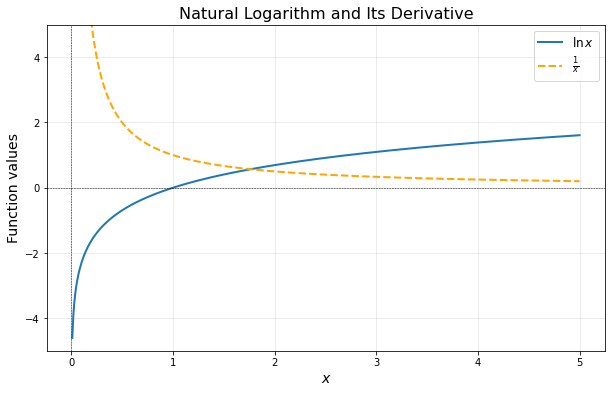

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the natural logarithm and its derivative
def ln(x):
    return np.log(x)

def dln(x):
    return 1 / x

# Define the x range for the plot (avoid x=0 to prevent undefined values)
x = np.linspace(0.01, 5, 500)
y_ln = ln(x)
y_dln = dln(x)

# Plot the natural logarithm and its derivative with y-axis limits
plt.figure(figsize=(10, 6))
plt.plot(x, y_ln, label=r"$\ln x$", linewidth=2)
plt.plot(x, y_dln, label=r"$\frac{1}{x}$", linestyle="--", linewidth=2, color="orange")

# Add labels, legend, and grid
plt.title("Natural Logarithm and Its Derivative", fontsize=16)
plt.xlabel("$x$", fontsize=14)
plt.ylabel("Function values", fontsize=14)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.ylim(-5, 5)  # Limit y-axis to -5 to 5
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## Logarithms with other bases

Logarithms with bases different from $e$ can be written as

$$
\log_a b = \frac{\ln b}{\ln a}
$$

This allows us to compute the derivative of $\log_a x$:

$$
\begin{align}
\frac{d}{dx}\log_a x &= \frac{d}{dx}\frac{\ln x}{\ln a}\\
&= \frac{1}{\ln a}\frac{d}{dx}\ln x\\
&= \frac{1}{x\ln a}
\end{align}
$$

## The power rule for real exponents

So far we have proven the power rule only for exponents which are natural numbers:

$$
\frac{d}{dx}x^n = nx^{n-1}
$$

Now we are in the position to generalize this to any real exponents. We need the derivative for the exponential function and the natural logarithm plus the chain rule. Let's assume $x>0$.

$$
\begin{align}
\frac{d}{dx}x^a &=\frac{d}{dx}(e^{\ln x})^a\\
&=\frac{d}{dx} e^{a\ln x}\\
&= \frac{d}{dx}a\ln x \left(\left.\frac{d}{dx}e^y\right|_{y=a\ln x}\right)\\
&= \frac{a}{x}e^{a\ln x}\\
&= \frac{a}{x}x^a\\
&= ax^{n-1}
\end{align}
$$

# The sigmoid/logistic function


$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$


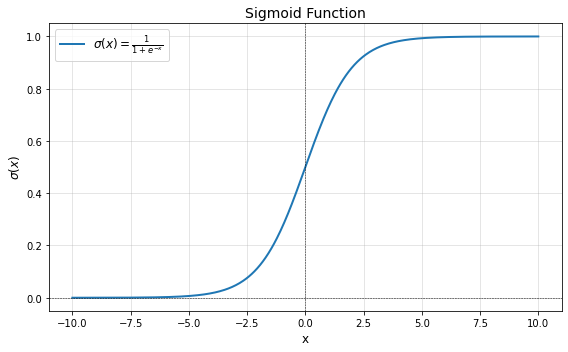

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-10, 10, 500)

# Calculate sigmoid values
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$", linewidth=2)
plt.title("Sigmoid Function", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel(r"$\sigma(x)$", fontsize=12)
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.grid(alpha=0.4)
plt.legend(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


- frequently used in machine learning and statistics
- maps the real line to $(0,1)$
- output can be interpreted as probability (cf. *logistic regression*)
- popular also as activation function between neural network layers

### derivative of the sigmoid

$$
\begin{align}
\frac{d}{dx}\sigma(x) &= \frac{d}{dx}\frac{1}{1+e^{-x}}\\
&=\frac{e^{-x}}{(1+e^{-x})^2}\\
\end{align}
$$

Now note that

$$
\begin{align}
\sigma(x) &= \frac{1}{1+e^{-x}}\\
1-\sigma(x) &= \frac{e^{-x}}{1+e^x}\\
\sigma(x)(1-\sigma(x)) &= \frac{e^{-x}}{(1+e^{-x})^2}
\end{align}
$$

Therefore:
$$
\Large \frac{d}{dx}\sigma(x) = \sigma(x)(1-\sigma(x))
$$

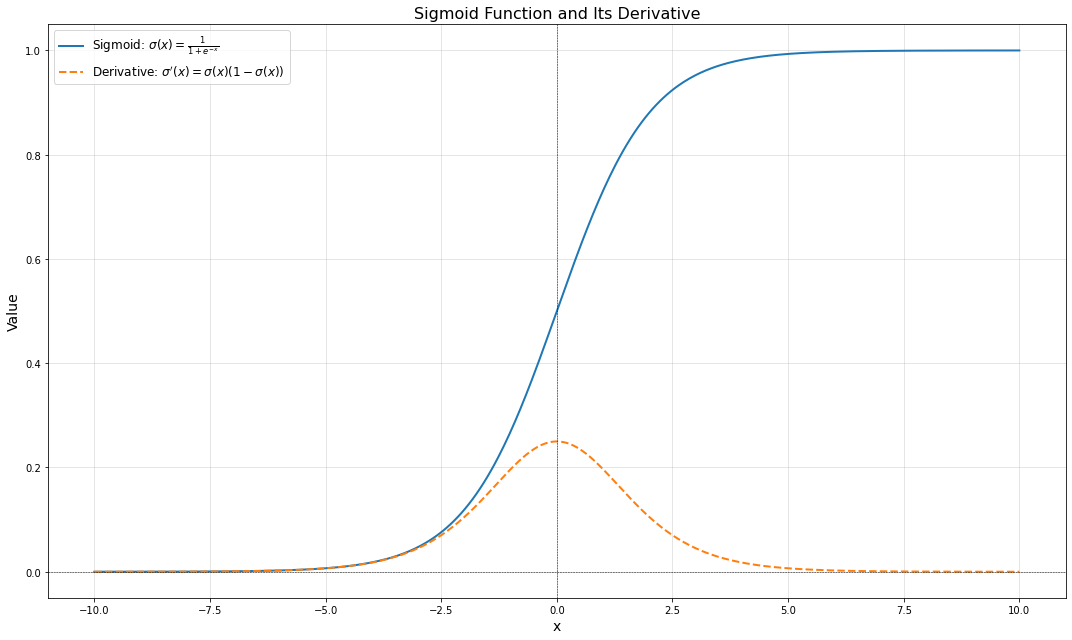

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

# Generate x values
x = np.linspace(-10, 10, 500)

# Calculate sigmoid values and derivatives
y = sigmoid(x)
y_derivative = sigmoid_derivative(x)

# Create the plot
plt.figure(figsize=(15, 9))
plt.plot(x, y, label=r"Sigmoid: $\sigma(x) = \frac{1}{1+e^{-x}}$", linewidth=2)
plt.plot(x, y_derivative, label=r"Derivative: $\sigma'(x) = \sigma(x)(1-\sigma(x))$", linewidth=2, linestyle='--')
plt.title("Sigmoid Function and Its Derivative", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.grid(alpha=0.4)
plt.legend(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


## The logit function

The *logit* function is the inverse of the sigmoid function.

$$
\begin{align}
x &= \sigma(y)\\
&= \frac{1}{1+e^{-y}}\\
x(1+e^{-y}) &= 1\\
x + xe^{-y} &= 1\\
xe^{-y} &= 1-x\\
e^{-y} &= \frac{1-x}{x}\\
-y &= \ln \frac{1-x}{x}\\
y &= -\ln \frac{1-x}{x}\\
&= \ln \left(\frac{1-x}{x}\right)^{-1}\\
\sigma^{-1}(x)&= \ln\frac{x}{1-x}
\end{align}
$$

$$
\begin{align}
\frac{d}{dx}\sigma^{-1}(x) &= \frac{d}{dx}\frac{x}{1-x}\left.\frac{d}{dz}\ln z\right|_{z = \frac{x}{1-x}}\\
&=\frac{1-x+x}{(1-x)^2} \frac{1}{\frac{x}{1-x}}\\
&=\frac{1}{(1-x)^2}\frac{1-x}{x}\\
&=\frac{1}{x(1-x)}
\end{align}
$$

## Hyperbolic Functions

There is a group of functions based on the exponential function that share some similarities with the trigonometric functions. They are called *hyperbolic sine*, *hyperbolic cosine*, etc.

### Definitions:
$$
\begin{align}
\sinh x &= \frac{e^x - e^{-x}}{2} \quad &\text{(hyperbolic sine)}\\
\cosh x &= \frac{e^x + e^{-x}}{2} \quad &\text{(hyperbolic cosine)}\\
\tanh x &= \frac{\sinh x}{\cosh x} = \frac{e^x - e^{-x}}{e^x + e^{-x}} \quad &\text{(hyperbolic tangent)}\\
\coth x &= \frac{\cosh x}{\sinh x} = \frac{e^x + e^{-x}}{e^x - e^{-x}}, \, x \neq 0 \quad &\text{(hyperbolic cotangent)}\\
\end{align}
$$




### Key Properties:

1. **Relationship Between $\sinh x$ and $\cosh x$:**
    $$
    \cosh^2 x - \sinh^2 x = 1
    $$

2. **Derivatives:**
    $$
    \frac{d}{dx}\sinh x = \cosh x, \quad \frac{d}{dx}\cosh x = \sinh x
    $$
    $$
    \frac{d}{dx}\tanh x = \frac{1}{\cosh^2 x}, \quad \frac{d}{dx}\coth x = -\frac{1}{\sinh^2 x} 
    $$

3. **Similar to Trigonometric Identities:**

    Hyperbolic functions arise naturally in problems involving hyperbolas, much like trigonometric functions arise in problems involving circles.

### Visualization:
The graphs of $\sinh x$, $\cosh x$, and $\tanh x$ illustrate their distinct shapes and relationships compared to their trigonometric counterparts.


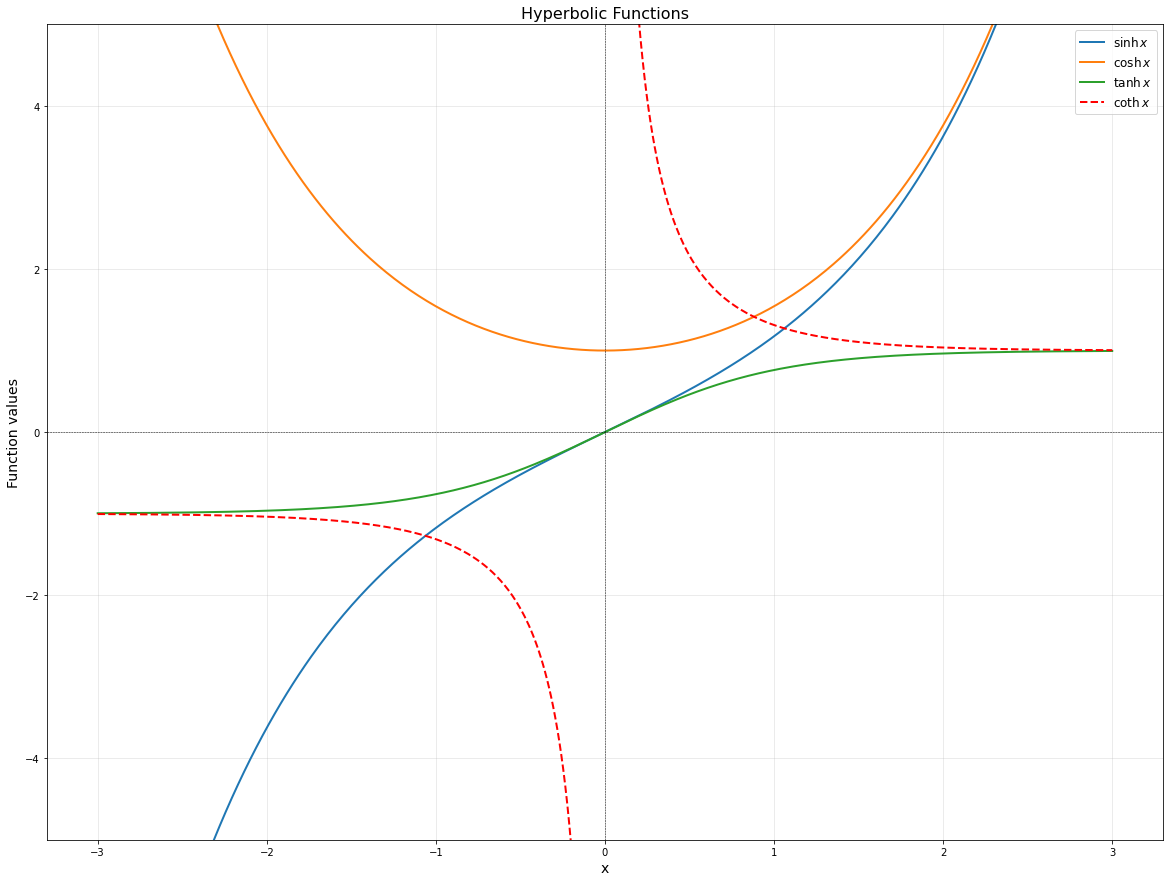

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x range
x = np.linspace(-3, 3, 500)

# Calculate hyperbolic functions
sinh_x = np.sinh(x)
cosh_x = np.cosh(x)
tanh_x = np.tanh(x)

# Split x and coth(x) into two parts: left and right of 0
x_left = x[x < 0]
x_right = x[x > 0]

cotanh_x_left = 1 / np.tanh(x_left)
cotanh_x_right = 1 / np.tanh(x_right)

# Define a common color for coth(x)
coth_color = 'red'

# Plot the functions with a larger figure size
plt.figure(figsize=(20, 15))  # Increased figure size
plt.plot(x, sinh_x, label=r'$\sinh x$', linewidth=2)
plt.plot(x, cosh_x, label=r'$\cosh x$', linewidth=2)
plt.plot(x, tanh_x, label=r'$\tanh x$', linewidth=2)
plt.plot(x_left, cotanh_x_left, label=r'$\coth x$', linewidth=2, linestyle='--', color=coth_color)
plt.plot(x_right, cotanh_x_right, label=None, linewidth=2, linestyle='--', color=coth_color)

# Add labels, legend, and grid
plt.title('Hyperbolic Functions', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('Function values', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.ylim(-5, 5)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## The second derivative

The derivative, being a function, has a derivative itself. This is called the **second derivative**, denoted by $f''(x)$ or $\frac{d^2 x}{dy^2}$.

#### Examples

1. **Example 1: Polynomial Function**

   Given $f(x) = x^3 - 3x^2 + 5x - 7$:
   - First derivative: $f'(x) = 3x^2 - 6x + 5$
   - Second derivative: $f''(x) = 6x - 6$

2. **Example 2: Exponential Function**

   Given $f(x) = e^x$:
   - First derivative: $f'(x) = e^x$
   - Second derivative: $f''(x) = e^x$

3. **Example 3: Trigonometric Function**

   Given $f(x) = \sin(x)$:
   - First derivative: $f'(x) = \cos(x)$
   - Second derivative: $f''(x) = -\sin(x)$


Of course this can be extended to the third, fourth etc. derivative. In practice, only the first and second derivative is relevant.


#### Interpretation of the Second Derivative

- **Concavity**: The second derivative helps determine whether a function is concave up ($f''(x) > 0$) or concave down ($f''(x) < 0$).
- **Inflection Points**: Points where $f''(x) = 0$ and the concavity changes are called inflection points.

#### Applications of the Second Derivative

- **Optimization**: The second derivative is used in the second derivative test to classify critical points as local minima or maxima.
- **Motion**: In physics, the second derivative of position with respect to time represents acceleration.